In [2]:
# Upload the dataset in Colab
from google.colab import files
uploaded = files.upload()

Saving Unicorn_Companies.csv to Unicorn_Companies.csv


## **Step 1: Load and Explore the Dataset**

In [5]:
# Assuming the file is named 'Unicorn_Companies.csv'
import pandas as pd

# Load the dataset
df = pd.read_csv('Unicorn_Companies.csv')

# Display the shape and first few rows of the dataset
print("Dataset Shape: ", df.shape)
df.head(10)

Dataset Shape:  (1037, 13)


,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits
0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2012.0,$7.44B,IPO,28.0,8.0,5.0
1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2002.0,$6.874B,NaN,29.0,12.0,NaN
2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2010.0,$2.901B,Asset,39.0,12.0,1.0
3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2005.0,$3.472B,Acquired,56.0,13.0,1.0
4,Epic Games,$42,10/26/2018,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures",1991.0,$4.377B,Acquired,25.0,5.0,2.0
5,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",2012.0,$571.26M,NaN,26.0,8.0,NaN
6,Checkout.com,$40,5/2/2019,United Kingdom,London,Fintech,"Tiger Global Management, Insight Partners, DST...",2012.0,$1.83B,NaN,15.0,4.0,NaN
7,Instacart,$39,12/30/2014,United States,San Francisco,"Supply chain, logistics, & delivery","Khosla Ventures, Kleiner Perkins Caufield & By...",2012.0,$2.686B,NaN,29.0,12.0,NaN
8,Databricks,$38,2/5/2019,United States,San Francisco,Data management & analytics,"Andreessen Horowitz, New Enterprise Associates...",2013.0,$3.497B,NaN,29.0,8.0,NaN
9,Revolut,$33,4/26/2018,United Kingdom,London,Fintech,"index Ventures, DST Global, Ribbit Capital",2015.0,$1.716B,NaN,31.0,6.0,NaN


# **Step 2: Inspect the Dataset Structure**

In [6]:
# Check the data types of each column
print("Data Types:\n", df.dtypes)

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Display summary statistics for numerical columns
df.describe()


Data Types:
 Company               object
Valuation ($B)        object
Date Joined           object
Country               object
City                  object
Industry              object
Select Inverstors     object
Founded Year         float64
Total Raised          object
Financial Stage       object
Investors Count      float64
Deal Terms           float64
Portfolio Exits      float64
dtype: object

Missing Values:
 Company                0
Valuation ($B)         0
Date Joined            0
Country                0
City                   0
Industry               0
Select Inverstors     17
Founded Year          43
Total Raised          24
Financial Stage      988
Investors Count        1
Deal Terms            29
Portfolio Exits      988
dtype: int64


,Founded Year,Investors Count,Deal Terms,Portfolio Exits
count,994.000000,1036.000000,1008.000000,49.000000
mean,2012.710262,14.432432,3.093254,1.346939
std,5.942876,9.946537,2.159764,0.751416
min,1919.000000,1.000000,1.000000,1.000000
25%,2011.000000,8.000000,1.000000,1.000000
50%,2014.000000,13.000000,3.000000,1.000000
75%,2016.000000,19.000000,4.000000,1.000000
max,2021.000000,91.000000,19.000000,5.000000


## **Step 3: Data Cleaning and Preparation**

In [7]:
# Optionally, drop rows with missing values (if necessary)
df_clean = df.dropna()  # You can modify this if you'd rather fill missing values

# Check for duplicate rows and remove them
df_clean = df_clean.drop_duplicates()

# Convert any necessary columns (if applicable) - example for a date column
# df_clean['Date_Column'] = pd.to_datetime(df_clean['Date_Column'])

# Display the cleaned dataset's shape and check for any remaining missing values
print("Cleaned Dataset Shape: ", df_clean.shape)
print("\nMissing Values after Cleaning:\n", df_clean.isnull().sum())


Cleaned Dataset Shape:  (46, 13)

Missing Values after Cleaning:
 Company              0
Valuation ($B)       0
Date Joined          0
Country              0
City                 0
Industry             0
Select Inverstors    0
Founded Year         0
Total Raised         0
Financial Stage      0
Investors Count      0
Deal Terms           0
Portfolio Exits      0
dtype: int64


# **Step 4: Exploratory Data Analysis (EDA)**

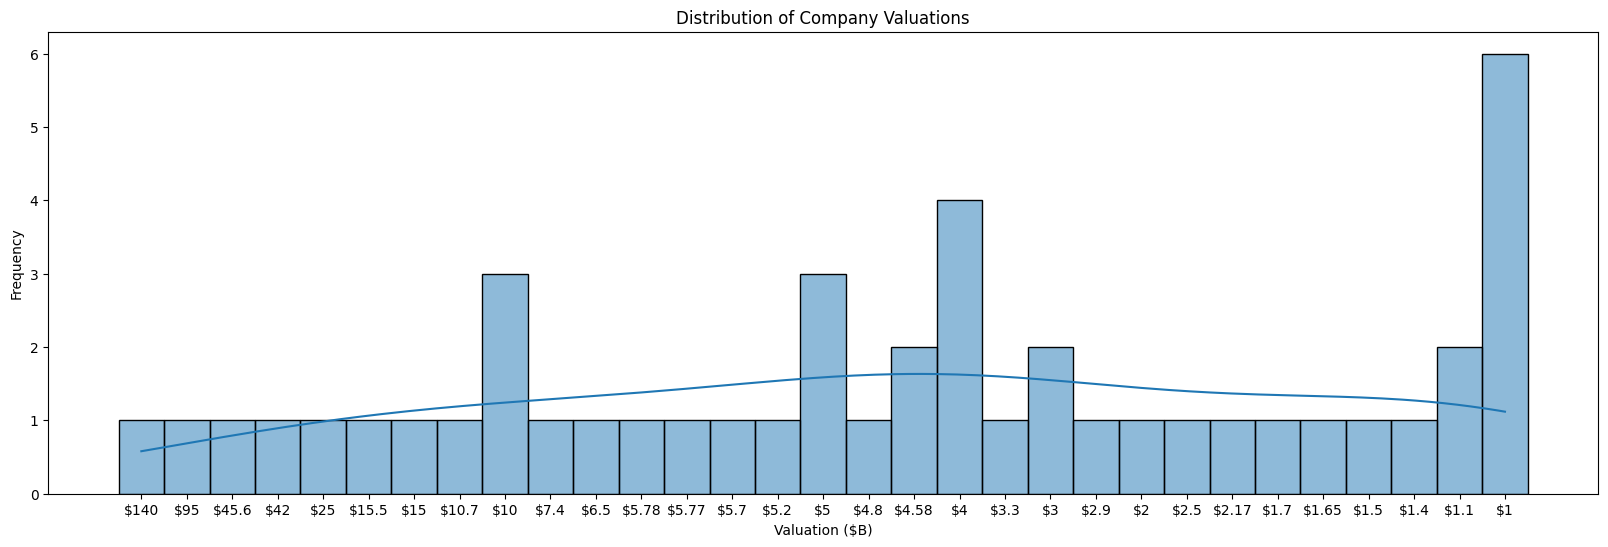

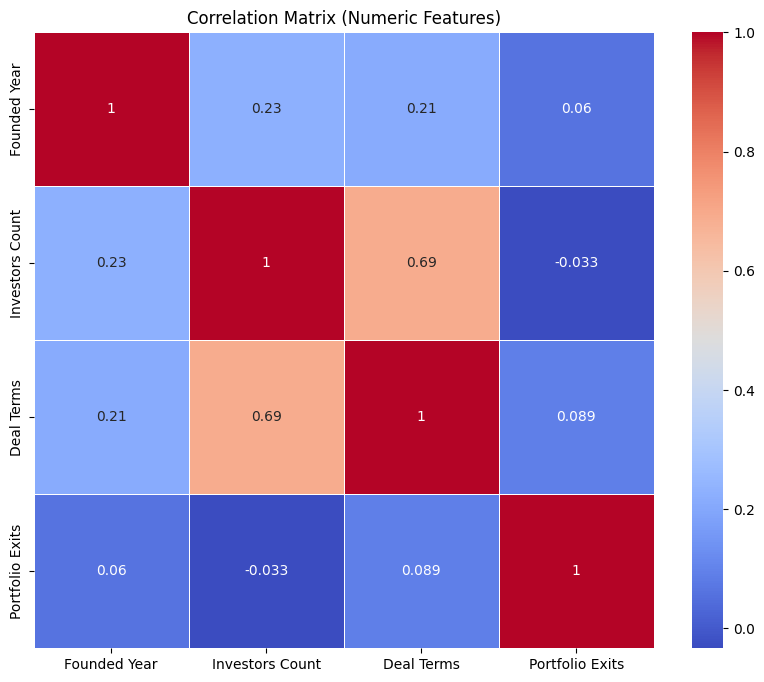

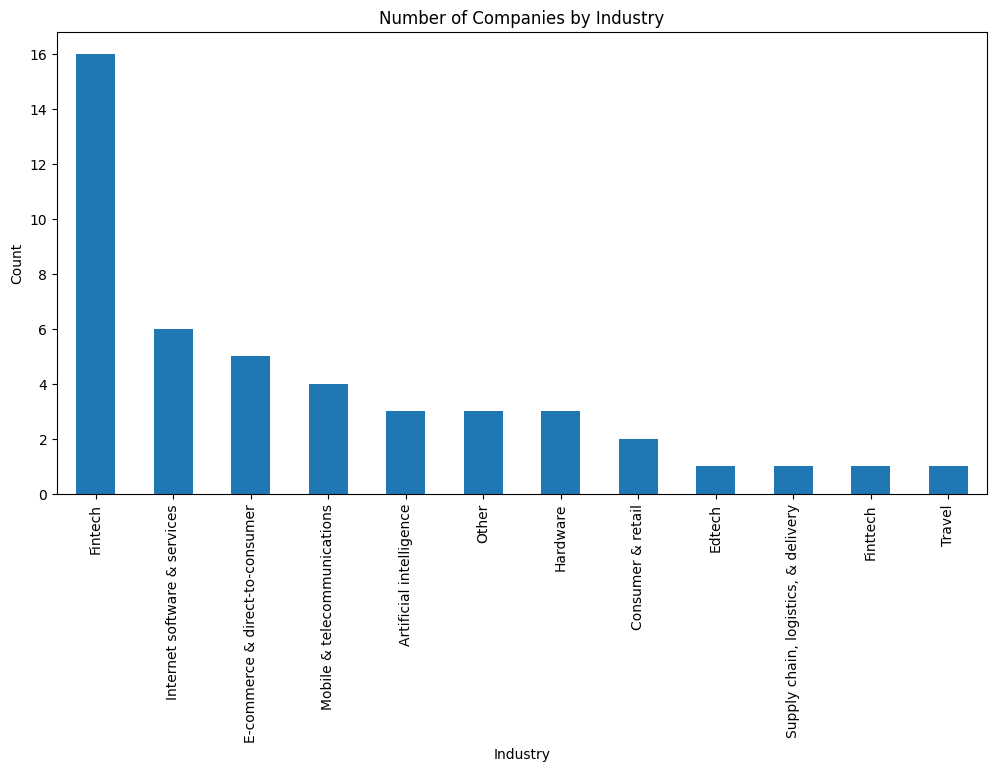

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the distribution of a key numerical column (e.g., Valuation in billions)
plt.figure(figsize=(20,6))
sns.histplot(df_clean['Valuation ($B)'], bins=30, kde=True)
plt.title('Distribution of Company Valuations')
plt.xlabel('Valuation ($B)')
plt.ylabel('Frequency')
plt.show()

numeric_df = df_clean.select_dtypes(include=['float64', 'int64'])

# Plot the correlation matrix of the numeric columns
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix (Numeric Features)')
plt.show()

# Bar plot for a key categorical variable (e.g., Industry)
plt.figure(figsize=(12,6))
df_clean['Industry'].value_counts().plot(kind='bar')
plt.title('Number of Companies by Industry')
plt.xlabel('Industry')
plt.ylabel('Count')
plt.show()


1. Distribution of Company Valuations (Histogram)

**What it does**: This plot shows the distribution of a single numerical variable—in this case, the valuation of companies in billions of dollars.
Purpose: The goal is to understand how company valuations are spread across the dataset. For example, are most companies valued at a lower range, or are they more evenly distributed across high and low valuations?

**Purpose**: The goal is to understand how company valuations are spread across the dataset. For example, are most companies valued at a lower range, or are they more evenly distributed across high and low valuations?

2. Correlation Matrix (Heatmap)

**What it does**: This heatmap shows the correlations between different numerical variables in the dataset. Correlation measures how strongly two variables are related (positive correlation means that as one variable increases, the other increases, and vice versa for negative correlation).

**Purpose**: This is useful to identify any relationships between the variables. For example, is there a strong correlation between the age of a company and its valuation?

3. Number of Companies by Industry (Bar Plot)
**What it does**: This bar plot shows the count of companies in the dataset grouped by industry.

**Purpose**: The goal here is to understand which industries have the most unicorn companies. This kind of plot is especially useful for categorical variables like "Industry," "Country," etc.



# **Step 5: Create Advanced D3.js Visualizations**

1. Interactive Bar Charts: For comparing values like industry or company valuation.

In [15]:
from IPython.display import display, HTML

# Define HTML code to embed a D3.js visualization
html_code = '''
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Interactive D3 Bar Chart</title>
    <script src="https://d3js.org/d3.v7.min.js"></script>
    <style>
        body { font-family: Arial, sans-serif; }
        .bar:hover {
            fill: orange;
        }
    </style>
</head>
<body>
    <svg width="800" height="500"></svg>
    <script>
        // Sample data for companies by industry
        const data = [
            {"Industry": "E-Commerce", "Count": 50},
            {"Industry": "FinTech", "Count": 45},
            {"Industry": "AI", "Count": 30},
            {"Industry": "HealthTech", "Count": 25},
            {"Industry": "EdTech", "Count": 20}
        ];

        const svg = d3.select("svg");
        const margin = {top: 20, right: 30, bottom: 40, left: 40};
        const width = svg.attr("width") - margin.left - margin.right;
        const height = svg.attr("height") - margin.top - margin.bottom;

        const x = d3.scaleBand()
            .domain(data.map(d => d.Industry))
            .range([margin.left, width - margin.right])
            .padding(0.1);

        const y = d3.scaleLinear()
            .domain([0, d3.max(data, d => d.Count)]).nice()
            .range([height - margin.bottom, margin.top]);

        svg.append("g")
            .attr("fill", "steelblue")
          .selectAll("rect")
          .data(data)
          .enter().append("rect")
            .attr("class", "bar")
            .attr("x", d => x(d.Industry))
            .attr("y", d => y(d.Count))
            .attr("height", d => y(0) - y(d.Count))
            .attr("width", x.bandwidth());

        svg.append("g")
            .attr("transform", `translate(0,${height - margin.bottom})`)
            .call(d3.axisBottom(x));

        svg.append("g")
            .attr("transform", `translate(${margin.left},0)`)
            .call(d3.axisLeft(y));

        svg.append("text")
            .attr("x", width / 2 )
            .attr("y", margin.top / 2)
            .style("text-anchor", "middle")
            .style("font-size", "16px")
            .text("Number of Companies by Industry");

    </script>
</body>
</html>
'''

# Display the D3 visualization in Colab
display(HTML(html_code))


What above Code Does:

**Data**: The data array contains the count of companies in different industries (you can customize this using your actual data).

**D3.js logic**: It creates a bar chart where each bar represents an industry, and the height of the bar represents the number of companies in that industry.
Interactivity: When you hover over a bar, the color changes to orange, making the chart interactive.

**Sankey Diagram**

Sankey diagrams are great for visualizing flows between different categories, such as the movement of companies between industries or countries.

In [36]:
from IPython.display import display, HTML

# HTML and JavaScript code for the D3.js line graph in Colab
html_code = '''
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>D3 Line Graph in Colab</title>
    <script src="https://d3js.org/d3.v7.min.js"></script>
    <style>
        body { font-family: Arial, sans-serif; }
        .line {
            fill: none;
            stroke-width: 3px;
        }
        .dot:hover {
            fill: orange;
        }
        .tooltip {
            position: absolute;
            background-color: white;
            border: 1px solid black;
            padding: 5px;
            border-radius: 4px;
            font-size: 12px;
            pointer-events: none;
        }
    </style>
</head>
<body>
    <svg width="800" height="500"></svg>
    <div class="tooltip" style="visibility: hidden;"></div>
    <script>
        // Data for the line graph
        const data = [
            {"Valuation": 140, "Year": 2006},
            {"Valuation": 100, "Year": 2009},
            {"Valuation": 95, "Year": 2010},
            {"Valuation": 80, "Year": 2012},
            {"Valuation": 50, "Year": 2013}
        ];

        const svg = d3.select("svg");
        const margin = {top: 20, right: 30, bottom: 40, left: 50};
        const width = svg.attr("width") - margin.left - margin.right;
        const height = svg.attr("height") - margin.top - margin.bottom;

        const x = d3.scaleLinear()
            .domain([2000, d3.max(data, d => d.Year)]).nice()
            .range([margin.left, width - margin.right]);

        const y = d3.scaleLinear()
            .domain([0, d3.max(data, d => d.Valuation)]).nice()
            .range([height - margin.bottom, margin.top]);

        // Line generator
        const line = d3.line()
            .x(d => x(d.Year))
            .y(d => y(d.Valuation));

        // Create the line path
        svg.append("path")
            .datum(data)
            .attr("class", "line")
            .attr("d", line)
            .style("stroke", "steelblue");

        // X-axis
        svg.append("g")
            .attr("transform", `translate(0,${height - margin.bottom})`)
            .call(d3.axisBottom(x).tickFormat(d3.format("d")));

        // Y-axis
        svg.append("g")
            .attr("transform", `translate(${margin.left},0)`)
            .call(d3.axisLeft(y));

        // Labels
        svg.append("text")
            .attr("x", width / 2)
            .attr("y", margin.top / 2)
            .attr("text-anchor", "middle")
            .style("font-size", "16px")
            .text("Company Valuation Over Time");

        // Add dots to each data point
        svg.append("g")
            .selectAll(".dot")
            .data(data)
            .enter().append("circle")
            .attr("class", "dot")
            .attr("cx", d => x(d.Year))
            .attr("cy", d => y(d.Valuation))
            .attr("r", 5)
            .attr("fill", "steelblue");

        // Add tooltips
        const tooltip = d3.select(".tooltip");

        svg.selectAll(".dot")
            .on("mouseover", (event, d) => {
                tooltip.style("visibility", "visible")
                       .text(`Year: ${d.Year}, Valuation: ${d.Valuation}B`);
            })
            .on("mousemove", event => {
                tooltip.style("top", (event.pageY - 20) + "px")
                       .style("left", (event.pageX + 10) + "px");
            })
            .on("mouseout", () => tooltip.style("visibility", "hidden"));
    </script>
</body>
</html>
'''

# Display the HTML content directly in Colab
display(HTML(html_code))


In [35]:
from IPython.display import display, HTML

# HTML code for an interactive D3.js Line Graph with zooming and panning
html_code = '''
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Customized D3 Line Graph with Zoom and Pan</title>
    <script src="https://d3js.org/d3.v7.min.js"></script>
    <style>
        body { font-family: Arial, sans-serif; }
        .line {
            fill: none;
            stroke-width: 3px;
        }
        .dot:hover {
            fill: orange;
        }
        .axis-label {
            font-size: 12px;
        }
        .tooltip {
            position: absolute;
            background-color: white;
            border: 1px solid black;
            padding: 5px;
            border-radius: 4px;
            font-size: 12px;
            pointer-events: none;
        }
    </style>
</head>
<body>
    <svg width="800" height="500"></svg>
    <div class="tooltip" style="visibility: hidden;"></div>
    <script>
        const data1 = [
            {"Valuation": 140, "Year": 2006},
            {"Valuation": 100, "Year": 2009},
            {"Valuation": 95, "Year": 2010},
            {"Valuation": 80, "Year": 2012},
            {"Valuation": 50, "Year": 2013}
        ];

        const data2 = [
            {"Valuation": 120, "Year": 2006},
            {"Valuation": 110, "Year": 2009},
            {"Valuation": 85, "Year": 2010},
            {"Valuation": 70, "Year": 2012},
            {"Valuation": 40, "Year": 2013}
        ];

        const svg = d3.select("svg");
        const margin = {top: 20, right: 30, bottom: 40, left: 50};
        const width = svg.attr("width") - margin.left - margin.right;
        const height = svg.attr("height") - margin.top - margin.bottom;

        const x = d3.scaleLinear()
            .domain([2000, d3.max(data1, d => d.Year)]).nice()
            .range([margin.left, width - margin.right]);

        const y = d3.scaleLinear()
            .domain([0, d3.max(data1, d => d.Valuation)]).nice()
            .range([height - margin.bottom, margin.top]);

        // Line generator
        const line = d3.line()
            .x(d => x(d.Year))
            .y(d => y(d.Valuation));

        // Gradient for the first line
        const gradient = svg.append("defs")
          .append("linearGradient")
          .attr("id", "line-gradient")
          .attr("gradientUnits", "userSpaceOnUse")
          .attr("x1", 0).attr("y1", y(0))
          .attr("x2", 0).attr("y2", y(140))
          .selectAll("stop")
          .data([
              {offset: "0%", color: "blue"},
              {offset: "100%", color: "green"}
          ])
          .enter().append("stop")
          .attr("offset", d => d.offset)
          .attr("stop-color", d => d.color);

        // Zooming and Panning
        const zoom = d3.zoom()
            .scaleExtent([1, 5])  // Allow zoom levels from 1x to 5x
            .translateExtent([[0, 0], [width, height]])
            .on("zoom", zoomed);

        svg.call(zoom);

        function zoomed(event) {
            const transform = event.transform;
            const newX = transform.rescaleX(x);
            const newY = transform.rescaleY(y);

            // Update the line paths during zoom
            svg.selectAll(".line")
                .attr("d", line.x(d => newX(d.Year)).y(d => newY(d.Valuation)));

            // Update the dots during zoom
            svg.selectAll(".dot")
                .attr("cx", d => newX(d.Year))
                .attr("cy", d => newY(d.Valuation));

            // Update the axes during zoom
            svg.select(".x-axis").call(d3.axisBottom(newX));
            svg.select(".y-axis").call(d3.axisLeft(newY));
        }

        // Create first line with gradient
        svg.append("path")
            .datum(data1)
            .attr("class", "line")
            .attr("d", line)
            .style("stroke", "url(#line-gradient)");

        // Create second line
        svg.append("path")
            .datum(data2)
            .attr("class", "line")
            .attr("d", line)
            .style("stroke", "red");

        // X-axis
        svg.append("g")
            .attr("class", "x-axis")
            .attr("transform", `translate(0,${height - margin.bottom})`)
            .call(d3.axisBottom(x).tickFormat(d3.format("d")));

        // Y-axis with gridlines
        svg.append("g")
            .attr("class", "y-axis")
            .attr("transform", `translate(${margin.left},0)`)
            .call(d3.axisLeft(y))
            .call(g => g.selectAll(".tick line")
                .attr("stroke-opacity", 0.7)
                .attr("stroke-dasharray", "2,2"));

        // Labels
        svg.append("text")
            .attr("x", width / 2)
            .attr("y", margin.top / 2)
            .attr("text-anchor", "middle")
            .style("font-size", "16px")
            .text("Company Valuation Over Time");

        // Add dots with tooltips for first line
        const tooltip = d3.select(".tooltip");

        svg.append("g")
            .selectAll(".dot")
            .data(data1)
            .enter().append("circle")
            .attr("class", "dot")
            .attr("cx", d => x(d.Year))
            .attr("cy", d => y(d.Valuation))
            .attr("r", 8)
            .attr("fill", "steelblue")
            .attr("stroke", "black")
            .attr("stroke-width", 2)
            .on("mouseover", (event, d) => {
                tooltip.style("visibility", "visible")
                       .text(`Year: ${d.Year}, Valuation: ${d.Valuation}B`);
            })
            .on("mousemove", event => {
                tooltip.style("top", (event.pageY - 20) + "px")
                       .style("left", (event.pageX + 10) + "px");
            })
            .on("mouseout", () => tooltip.style("visibility", "hidden"));
    </script>
</body>
</html>
'''

# Display the HTML content directly in Colab
display(HTML(html_code))


In [39]:
from IPython.display import display, HTML

# HTML code for an interactive D3.js Force-Directed Graph for the Startup Dataset in Colab
html_code = '''
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Startup Force-Directed Graph</title>
    <script src="https://d3js.org/d3.v7.min.js"></script>
    <style>
        body { font-family: Arial, sans-serif; }
        .node circle {
            stroke: #fff;
            stroke-width: 1.5px;
        }
        .link {
            stroke: #999;
            stroke-opacity: 0.6;
        }
        .tooltip {
            position: absolute;
            background-color: white;
            border: 1px solid black;
            padding: 5px;
            border-radius: 4px;
            font-size: 12px;
            pointer-events: none;
        }
    </style>
</head>
<body>
    <svg width="800" height="600"></svg>
    <div class="tooltip" style="visibility: hidden;"></div>
    <script>
        const svg = d3.select("svg"),
            width = +svg.attr("width"),
            height = +svg.attr("height");

        // Data representing startups and their connections (e.g., partnerships)
        const graph = {
            "nodes": [
                {"id": "Bytedance", "valuation": 140},
                {"id": "SpaceX", "valuation": 100},
                {"id": "Stripe", "valuation": 95},
                {"id": "Instacart", "valuation": 80},
                {"id": "Grab", "valuation": 50}
            ],
            "links": [
                {"source": "Bytedance", "target": "SpaceX"},
                {"source": "SpaceX", "target": "Stripe"},
                {"source": "Stripe", "target": "Instacart"},
                {"source": "Instacart", "target": "Grab"},
                {"source": "Grab", "target": "Bytedance"}
            ]
        };

        const simulation = d3.forceSimulation(graph.nodes)
            .force("link", d3.forceLink(graph.links).id(d => d.id).distance(150))
            .force("charge", d3.forceManyBody().strength(-400))
            .force("center", d3.forceCenter(width / 2, height / 2));

        const link = svg.append("g")
            .attr("class", "links")
            .selectAll("line")
            .data(graph.links)
            .enter().append("line")
            .attr("class", "link")
            .attr("stroke-width", 2);

        const node = svg.append("g")
            .attr("class", "nodes")
            .selectAll("g")
            .data(graph.nodes)
            .enter().append("g");

        const circles = node.append("circle")
            .attr("r", 10)
            .attr("fill", d => {
                if (d.valuation > 100) return "green";  // High valuation companies
                return "steelblue";  // Regular valuation companies
            })
            .call(d3.drag()
                .on("start", dragstarted)
                .on("drag", dragged)
                .on("end", dragended));

        const labels = node.append("text")
            .text(d => d.id)
            .attr("x", 12)
            .attr("y", 3);

        // Add tooltips to display company valuations
        node.on("mouseover", (event, d) => {
            d3.select(".tooltip")
                .style("visibility", "visible")
                .text(`${d.id}: $${d.valuation}B`);
        })
        .on("mousemove", event => {
            d3.select(".tooltip")
                .style("top", (event.pageY - 20) + "px")
                .style("left", (event.pageX + 10) + "px");
        })
        .on("mouseout", () => d3.select(".tooltip").style("visibility", "hidden"));

        simulation.on("tick", () => {
            link
                .attr("x1", d => d.source.x)
                .attr("y1", d => d.source.y)
                .attr("x2", d => d.target.x)
                .attr("y2", d => d.target.y);

            node
                .attr("transform", d => `translate(${d.x},${d.y})`);
        });

        function dragstarted(event, d) {
            if (!event.active) simulation.alphaTarget(0.3).restart();
            d.fx = d.x;
            d.fy = d.y;
        }

        function dragged(event, d) {
            d.fx = event.x;
            d.fy = event.y;
        }

        function dragended(event, d) {
            if (!event.active) simulation.alphaTarget(0);
            d.fx = null;
            d.fy = null;
        }
    </script>
</body>
</html>
'''

# Display the HTML content directly in Colab
display(HTML(html_code))


In [40]:
!pip install d3graph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 3.4 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.5
    Uninstalling MarkupSafe-2.1.5:
      Successfully uninstalled MarkupSafe-2.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
werkzeug 3.0.4 requires MarkupSafe>=2.1.1, but you have markupsafe 2.0.1 which is incompatible.


In [50]:
from IPython.display import display, HTML

# HTML and JavaScript code for an expanded D3.js Treemap in Colab
html_code = '''
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Expanded D3 Treemap</title>
    <script src="https://d3js.org/d3.v7.min.js"></script>
    <style>
        body { font-family: Arial, sans-serif; }
        .node {
            font-family: Arial, sans-serif;
            font-size: 12px;
            overflow: hidden;
        }
        .node rect {
            stroke: #fff;
            stroke-width: 1px;
        }
        .node:hover rect {
            stroke: #000;
            stroke-width: 1.5px;
        }
        .tooltip {
            position: absolute;
            background-color: white;
            border: 1px solid black;
            padding: 5px;
            border-radius: 4px;
            font-size: 12px;
            pointer-events: none;
            visibility: hidden;
        }
    </style>
</head>
<body>
    <div id="chart"></div>
    <script>
        const data = {
            "name": "Startups",
            "children": [
                { "name": "Bytedance", "valuation": 140 },
                { "name": "SpaceX", "valuation": 100 },
                { "name": "Stripe", "valuation": 95 },
                { "name": "Instacart", "valuation": 80 },
                { "name": "Grab", "valuation": 50 },
                { "name": "Shein", "valuation": 60 },
                { "name": "Robinhood", "valuation": 35 },
                { "name": "Chime", "valuation": 25 },
                { "name": "Revolut", "valuation": 33 },
                { "name": "Klarna", "valuation": 45 }
            ]
        };

        const width = 800;
        const height = 500;

        const svg = d3.select("#chart")
            .append("svg")
            .attr("width", width)
            .attr("height", height);

        const treemap = d3.treemap()
            .size([width, height])
            .padding(1);

        const root = d3.hierarchy(data)
            .sum(d => d.valuation);

        treemap(root);

        const node = svg.selectAll(".node")
            .data(root.leaves())
            .enter().append("g")
            .attr("class", "node")
            .attr("transform", d => `translate(${d.x0},${d.y0})`);

        node.append("rect")
            .attr("width", d => d.x1 - d.x0)
            .attr("height", d => d.y1 - d.y0)
            .attr("fill", d => d3.interpolateBlues(d.data.valuation / 140));  // Color based on valuation

        node.append("text")
            .attr("x", 4)
            .attr("y", 14)
            .text(d => `${d.data.name} ($${d.data.valuation}B)`);

        // Tooltips
        const tooltip = d3.select("body").append("div")
            .attr("class", "tooltip");

        node.on("mouseover", (event, d) => {
            tooltip.style("visibility", "visible")
                   .text(`${d.data.name}: $${d.data.valuation}B`);
        })
        .on("mousemove", event => {
            tooltip.style("top", (event.pageY - 10) + "px")
                   .style("left", (event.pageX + 10) + "px");
        })
        .on("mouseout", () => tooltip.style("visibility", "hidden"));
    </script>
</body>
</html>
'''

# Display the HTML content directly in Colab
display(HTML(html_code))


In [54]:
from IPython.display import display, HTML

# HTML and JavaScript code for a D3.js Bubble Chart with complex data in Colab
html_code = '''
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Bubble Chart with Complex Data</title>
    <script src="https://d3js.org/d3.v7.min.js"></script>
    <style>
        body { font-family: Arial, sans-serif; }
        .bubble {
            stroke: #fff;
            stroke-width: 1.5px;
        }
        .tooltip {
            position: absolute;
            background-color: white;
            border: 1px solid black;
            padding: 5px;
            border-radius: 4px;
            font-size: 12px;
            pointer-events: none;
            visibility: hidden;
        }
    </style>
</head>
<body>
    <div id="chart"></div>
    <script>
        const data = {
            "children": [
                { "name": "Bytedance", "valuation": 140, "industry": "Media", "country": "China", "stage": "IPO" },
                { "name": "SpaceX", "valuation": 100, "industry": "Aerospace", "country": "USA", "stage": "Private" },
                { "name": "Stripe", "valuation": 95, "industry": "FinTech", "country": "USA", "stage": "Private" },
                { "name": "Instacart", "valuation": 80, "industry": "E-commerce", "country": "USA", "stage": "IPO" },
                { "name": "Grab", "valuation": 50, "industry": "Ride Hailing", "country": "Singapore", "stage": "Public" },
                { "name": "Shein", "valuation": 60, "industry": "E-commerce", "country": "China", "stage": "Private" },
                { "name": "Robinhood", "valuation": 35, "industry": "FinTech", "country": "USA", "stage": "Public" },
                { "name": "Chime", "valuation": 25, "industry": "FinTech", "country": "USA", "stage": "Private" },
                { "name": "Revolut", "valuation": 33, "industry": "FinTech", "country": "UK", "stage": "Private" },
                { "name": "Klarna", "valuation": 45, "industry": "FinTech", "country": "Sweden", "stage": "Private" },
                { "name": "Databricks", "valuation": 38, "industry": "AI/Big Data", "country": "USA", "stage": "Private" },
                { "name": "Epic Games", "valuation": 31, "industry": "Gaming", "country": "USA", "stage": "Private" },
                { "name": "UiPath", "valuation": 35, "industry": "AI/Automation", "country": "USA", "stage": "Public" },
                { "name": "Rivian", "valuation": 28, "industry": "Automotive", "country": "USA", "stage": "Public" },
                { "name": "Discord", "valuation": 17, "industry": "Social", "country": "USA", "stage": "Private" }
            ]
        };

        const diameter = 800;  // Define the size of the chart
        const color = d3.scaleOrdinal(d3.schemeCategory10);  // Color scheme based on the industry

        const bubble = d3.pack()
            .size([diameter, diameter])
            .padding(1.5);

        const svg = d3.select("#chart")
            .append("svg")
            .attr("width", diameter)
            .attr("height", diameter)
            .attr("class", "bubble");

        const root = d3.hierarchy(data)
            .sum(d => d.valuation);

        bubble(root);

        const node = svg.selectAll(".node")
            .data(root.children)
            .enter().append("g")
            .attr("class", "node")
            .attr("transform", d => `translate(${d.x},${d.y})`);

        node.append("circle")
            .attr("r", d => d.r)
            .attr("fill", (d, i) => color(d.data.industry));  // Color based on industry

        node.append("text")
            .attr("dy", ".3em")
            .attr("text-anchor", "middle")
            .text(d => d.data.name);

        // Tooltips with more complex data
        const tooltip = d3.select("body").append("div")
            .attr("class", "tooltip");

        node.on("mouseover", (event, d) => {
            tooltip.style("visibility", "visible")
                   .html(`<strong>${d.data.name}</strong><br>
                         Industry: ${d.data.industry}<br>
                         Country: ${d.data.country}<br>
                         Stage: ${d.data.stage}<br>
                         Valuation: $${d.data.valuation}B`);
        })
        .on("mousemove", event => {
            tooltip.style("top", (event.pageY - 10) + "px")
                   .style("left", (event.pageX + 10) + "px");
        })
        .on("mouseout", () => tooltip.style("visibility", "hidden"));
    </script>
</body>
</html>
'''

# Display the HTML content directly in Colab
display(HTML(html_code))


# **Step 6: Creating a Sankey Diagram with D3.js**

A Sankey Diagram shows relationships between different categories and is perfect for displaying how companies are distributed across different sectors and locations, for example.

In [59]:
from IPython.display import display, HTML

# HTML and JavaScript code for an expanded D3.js Sankey Diagram in Colab with more industries
html_code = '''
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Expanded Sankey Diagram for Startups with More Industries</title>
    <script src="https://d3js.org/d3.v7.min.js"></script>
    <script src="https://cdn.jsdelivr.net/npm/d3-sankey@0.12.3/dist/d3-sankey.min.js"></script>
    <style>
        body { font-family: Arial, sans-serif; }
        .node rect {
            stroke: #000;
            stroke-width: 1px;
        }
        .link {
            fill: none;
            stroke-opacity: 0.5;
            transition: stroke 0.3s ease;
        }
        .tooltip {
            position: absolute;
            background-color: white;
            border: 1px solid black;
            padding: 5px;
            border-radius: 4px;
            font-size: 12px;
            pointer-events: none;
            visibility: hidden;
        }
    </style>
</head>
<body>
    <svg width="1000" height="700"></svg>
    <div class="tooltip"></div>
    <script>
        const data = {
            "nodes": [
                {"name": "Bytedance"}, {"name": "SpaceX"}, {"name": "Stripe"},
                {"name": "Instacart"}, {"name": "Grab"}, {"name": "Shein"},
                {"name": "Databricks"}, {"name": "Epic Games"}, {"name": "UiPath"},
                {"name": "Rivian"}, {"name": "Discord"}, {"name": "AWS"},
                {"name": "Boston Dynamics"}, {"name": "Coursera"},
                {"name": "FinTech"}, {"name": "Media"}, {"name": "E-commerce"},
                {"name": "Aerospace"}, {"name": "Ride Hailing"}, {"name": "AI/Big Data"},
                {"name": "Gaming"}, {"name": "AI/Automation"}, {"name": "Automotive"},
                {"name": "Social"}, {"name": "Cloud Computing"}, {"name": "Robotics"},
                {"name": "EdTech"}
            ],
            "links": [
                {"source": 0, "target": 15, "value": 140},  // Bytedance -> Media
                {"source": 1, "target": 17, "value": 100},  // SpaceX -> Aerospace
                {"source": 2, "target": 14, "value": 95},   // Stripe -> FinTech
                {"source": 3, "target": 16, "value": 80},   // Instacart -> E-commerce
                {"source": 4, "target": 18, "value": 50},   // Grab -> Ride Hailing
                {"source": 5, "target": 16, "value": 60},   // Shein -> E-commerce
                {"source": 6, "target": 19, "value": 38},   // Databricks -> AI/Big Data
                {"source": 7, "target": 20, "value": 31},   // Epic Games -> Gaming
                {"source": 8, "target": 21, "value": 35},   // UiPath -> AI/Automation
                {"source": 9, "target": 22, "value": 28},   // Rivian -> Automotive
                {"source": 10, "target": 23, "value": 17},  // Discord -> Social
                {"source": 2, "target": 14, "value": 35},   // Stripe -> FinTech (additional flow)
                {"source": 3, "target": 16, "value": 20},   // Instacart -> E-commerce (additional flow)
                {"source": 4, "target": 18, "value": 15},   // Grab -> Ride Hailing (additional flow)
                {"source": 11, "target": 24, "value": 90},  // AWS -> Cloud Computing
                {"source": 12, "target": 25, "value": 25},  // Boston Dynamics -> Robotics
                {"source": 13, "target": 26, "value": 6}    // Coursera -> EdTech
            ]
        };

        const width = 1000;
        const height = 700;

        const svg = d3.select("svg")
            .attr("width", width)
            .attr("height", height);

        // Color scale for startups and industries
        const startupColor = d3.scaleOrdinal(d3.schemeSet3);  // Set colors for startups
        const industryColor = d3.scaleOrdinal(d3.schemeTableau10);  // Set colors for industries

        const sankey = d3.sankey()
            .nodeWidth(20)
            .nodePadding(15)
            .extent([[1, 1], [width - 1, height - 6]]);

        const {nodes, links} = sankey({
            nodes: data.nodes.map(d => Object.assign({}, d)),
            links: data.links.map(d => Object.assign({}, d))
        });

        // Set the node colors based on whether it's a startup or an industry
        svg.append("g")
            .selectAll("rect")
            .data(nodes)
            .join("rect")
            .attr("x", d => d.x0)
            .attr("y", d => d.y0)
            .attr("height", d => d.y1 - d.y0)
            .attr("width", sankey.nodeWidth())
            .attr("fill", d => d.index < 14 ? startupColor(d.name) : industryColor(d.name))  // Different colors for startups vs industries
            .append("title")
            .text(d => `${d.name}\n${d.value}`);

        // Links inherit the color of the target (industry)
        const link = svg.append("g")
            .attr("fill", "none")
            .selectAll("g")
            .data(links)
            .join("g")
            .append("path")
            .attr("d", d3.sankeyLinkHorizontal())
            .attr("stroke-width", d => Math.max(1, d.width))
            .attr("class", "link")
            .style("stroke", d => industryColor(d.target.name))  // Links take the color of the industry
            .on("mouseover", function(event, d) {
                d3.select(this).style("stroke", "blue");  // Change link color to blue on hover
                d3.select(".tooltip")
                    .style("visibility", "visible")
                    .text(`${d.source.name} -> ${d.target.name}: $${d.value}B`);
            })
            .on("mousemove", event => {
                d3.select(".tooltip")
                    .style("top", (event.pageY - 10) + "px")
                    .style("left", (event.pageX + 10) + "px");
            })
            .on("mouseout", function() {
                d3.select(this).style("stroke", d => industryColor(d.target.name));  // Revert link color on mouse out
                d3.select(".tooltip").style("visibility", "hidden");
            });

        // Labels for nodes
        svg.append("g")
            .attr("font-family", "sans-serif")
            .attr("font-size", 10)
            .selectAll("text")
            .data(nodes)
            .join("text")
            .attr("x", d => d.x0 < width / 2 ? d.x1 + 6 : d.x0 - 6)
            .attr("y", d => (d.y1 + d.y0) / 2)
            .attr("dy", "0.35em")
            .attr("text-anchor", d => d.x0 < width / 2 ? "start" : "end")
            .text(d => d.name);
    </script>
</body>
</html>
'''

# Display the HTML content directly in Colab
display(HTML(html_code))
